In [6]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact

import sys
sys.path.append("../common/")
from util import *
import fmp

In [7]:
snd1 = load_wav("audio/Yesterday  The Beatles  Original  1965.wav")
snd2 = load_wav("audio/Ray Charles - Yesterday.wav")
fs = 22050
fft_len = 4096
hop_size = fft_len // 4

chroma_x = fmp.make_chromagram(snd1, fs, fft_len, hop_size, normalize=False)
chroma_x = fmp.cens(chroma_x, 11, 4)

chroma_y = fmp.make_chromagram(snd2, fs, fft_len, hop_size, normalize=False)
chroma_y = fmp.cens(chroma_y, 11, 4)



In [8]:
fft_len = 4096
hop_size = fft_len // 4

ds = 4
chroma_x = fmp.make_chromagram(snd1, fs, fft_len, hop_size, normalize=False)
chroma_x = fmp.cens(chroma_x, 11, ds)
chroma_y = fmp.make_chromagram(snd2, fs, fft_len, hop_size, normalize=False)
chroma_y = fmp.cens(chroma_y, 11, ds)

ff = fs / hop_size / ds


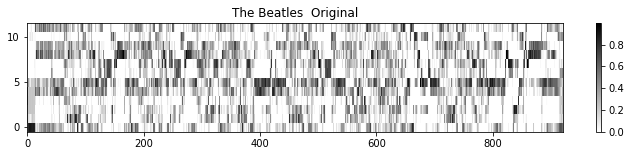

In [9]:
plt.rcParams['figure.figsize'] = (12, 2)
plt.imshow(chroma_y, aspect="auto", origin='lower',cmap='gray_r');
plt.yticks([0,5,10])
plt.title('The Beatles  Original')
plt.colorbar();
plt.savefig('./plots/chrom1')
plt.show()


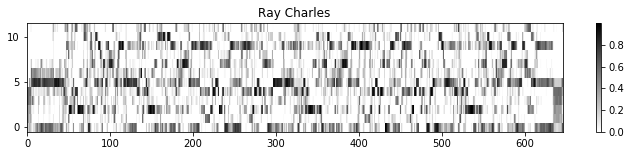

In [11]:
plt.rcParams['figure.figsize'] = (12, 2)
plt.imshow(chroma_x, aspect="auto", origin='lower',cmap='gray_r');
plt.yticks([0,5,10])
plt.title('Ray Charles')
plt.colorbar();
plt.savefig('./plots/chrom2')
plt.show()

In [ ]:
cost = fmp.make_cost_matrix(chroma_x, chroma_y)
path = fmp.dtw(cost, fmp.simple_steps_w(.8))[1]

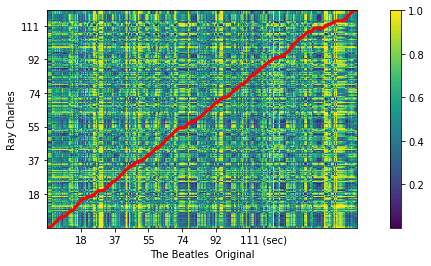

In [6]:
#plt.rcParams['figure.figsize'] = (12, 8)
plt.figure()
plt.imshow(cost, origin='lower');
plt.xlabel('The Beatles  Original')
plt.ylabel('Ray Charles')
plt.xticks(np.array([100,200,300,400,500,600]),np.array([str(int(100/ff)),str(int(200/ff)),str(int(300/ff)),str(int(400/ff)),str(int(500/ff)), '         ' + str(  int(600/ff))+' (sec)']))
plt.yticks(np.array([100,200,300,400,500,600,700,800,900]),np.array([str(int(100/ff)),str(int(200/ff)),str(int(300/ff)),str(int(400/ff)),str(int(500/ff)),str(int(600/ff)),str(int(700/ff)),str(int(800/ff)),'(sec) '+str(int(900/ff))]))
plt.colorbar();
plt.plot(path[:,1], path[:,0], '-r', linewidth=3)
plt.savefig('./plots/optimal path')
plt.show()
